## Загрузка и подготовка данных

In [1]:
COST_OF_RAW_MATERIALS_MLN = 0.45
BUDGET_OF_THE_REGION_MLN = 10000
POSSIBLE_WELLS = 200

In [3]:
import time
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lars,TheilSenRegressor,HuberRegressor,PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression,BayesianRidge,ElasticNet,OrthogonalMatchingPursuit
from sklearn.svm import SVR,NuSVR,LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer

C:\ana\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\ana\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
C:\Users\Алексей\AppData\Local\Temp\ipykernel_21248\3980375753.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profi

In [4]:
try:
    data_0 = pd.read_csv('geo_data_0.csv')
    data_1 = pd.read_csv('geo_data_1.csv')
    data_2 = pd.read_csv('geo_data_2.csv')
except:
    data_0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
    data_1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
    data_2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')

In [5]:
pandas_profiling.ProfileReport(data_1) 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

можно использовать пандас профилинг , но мне его и на хакатонах хватает, давайте всё ручками сделаем

In [6]:
def eda_info(data):
    print('head')
    print(data.head())
    print('info')
    print(data.info())
    print('isna')
    print(data.isna().sum())
    print('scatter_matrix')
    pd.plotting.scatter_matrix(data,figsize=(35,35),alpha=0.05)
    plt.show()
    print('describe')
    print(data.describe())
    print('corr')
    print(data.corr())
    print('product = 0')
    print(data[data['product']==0]['product'].count())

In [7]:
eda_info(data_0)

head
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
isna
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
scatter_matrix
describe
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean  

C:\Users\Алексей\AppData\Local\Temp\ipykernel_21248\3584985722.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\Алексей\AppData\Local\Temp\ipykernel_21248\3584985722.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())


вывод eda первый регион:
<br>самые важные столбцы не имеют пропусков
<br>явные дубликаты отсутствуют 
<br>странных значений обнаружено не было
<br>также обнаруженны не сильные корреляции между f1 and f0, f2 and product
<br>всего одна скважина в регионе не имеет запас нефти 

In [8]:
eda_info(data_1)

head
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
isna
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
scatter_matrix
describe
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.0

C:\Users\Алексей\AppData\Local\Temp\ipykernel_21248\3584985722.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\Алексей\AppData\Local\Temp\ipykernel_21248\3584985722.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())


вывод eda второй регион:
<br>самые важные столбцы не имеют пропусков
<br>явные дубликаты отсутствуют 
<br>странных значений обнаружено не было
<br>обнаруженна высокая линейная зависимость между f2 и product => стоит использовать линейную модель
<br>8% скважин в регионе пустые - очень большое количество 

In [9]:
eda_info(data_2)

head
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746
info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
isna
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
scatter_matrix
describe
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean  

C:\Users\Алексей\AppData\Local\Temp\ipykernel_21248\3584985722.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\Алексей\AppData\Local\Temp\ipykernel_21248\3584985722.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())


вывод eda второй регион:
ситуация аналогична с первой скважинной

## Обучение и проверка модели

<div class="alert alert-block alert-info">
<b>Комментарий:</b> 
проект делался какое-то время назад лучшее решение здесь - сделать функции , тогда я этим не особо пользовался
</div>

удаления лишних столбиков

In [10]:
data_0 = data_0.drop('id',axis = 1)
data_1 = data_1.drop('id',axis = 1)
data_2 = data_2.drop('id',axis = 1)

разбиение на X и y выборки 

In [11]:
X_0 = data_0.drop('product',axis = 1)
X_1 = data_1.drop('product',axis = 1)
X_2 = data_2.drop('product',axis = 1)
y_0 = data_0['product']
y_1 = data_1['product']
y_2 = data_2['product']

разбиение на учебные и валидационные выборки 

In [12]:
X_0_train, X_0_test, y_0_train, y_0_test = train_test_split(X_0, y_0, test_size=0.25, random_state=1)
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.25, random_state=1)
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.25, random_state=1)

нормализация данных

In [13]:
scaler = StandardScaler()
FTS = X_0_test.columns
X_0_train = scaler.fit_transform(X_0_train)
X_0_test = scaler.transform(X_0_test)
X_1_train = scaler.fit_transform(X_1_train)
X_1_test = scaler.transform(X_1_test)
X_2_train = scaler.fit_transform(X_2_train)
X_2_test = scaler.transform(X_2_test)


ради интереса посмотрим как ведут себя разные модели


In [14]:
regressors = {
     "XGBRegressor": XGBRegressor(),
     #"RandomForestRegressor": RandomForestRegressor(),
     "DecisionTreeRegressor": DecisionTreeRegressor(),
     #"GaussianProcessRegressor": GaussianProcessRegressor(),
     #"SVR": SVR(),
     #"NuSVR": NuSVR(),
     "LinearSVR": LinearSVR(),
     #"KernelRidge": KernelRidge(),
     "LinearRegression": LinearRegression(),
     "Ridge":Ridge(),
     "Lars": Lars(),
     "TheilSenRegressor": TheilSenRegressor(),
     "HuberRegressor": HuberRegressor(),
     "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
     "ARDRegression": ARDRegression(),
     "BayesianRidge": BayesianRidge(),
     "ElasticNet": ElasticNet(),
     "OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(),
 }

In [15]:
df_models = pd.DataFrame(columns=['model', 'run_time', 'rmse', 'rmse_cv'])
for key in regressors:

    print('*',key)

    start_time = time.time()

    regressor = regressors[key]
    model = regressor.fit(X_0_train, y_0_train)
    y_pred = model.predict(X_0_test)

    scores = cross_val_score(model, 
                             X_0_train, 
                             y_0_train,
                             scoring="neg_mean_squared_error", 
                             cv=5)

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'rmse': round(np.sqrt(mean_squared_error(y_0_test, y_pred))),
           'rmse_cv': round(np.mean(np.sqrt(-scores)))
    }
    df_models = df_models.append(row, ignore_index=True)

* XGBRegressor


C:\Users\Алексей\AppData\Local\Temp\ipykernel_21248\2730229182.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


* DecisionTreeRegressor


C:\Users\Алексей\AppData\Local\Temp\ipykernel_21248\2730229182.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\Алексей\AppData\Local\Temp\ipykernel_21248\2730229182.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


* LinearSVR
* LinearRegression


C:\Users\Алексей\AppData\Local\Temp\ipykernel_21248\2730229182.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\Алексей\AppData\Local\Temp\ipykernel_21248\2730229182.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\Алексей\AppData\Local\Temp\ipykernel_21248\2730229182.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


* Ridge
* Lars
* TheilSenRegressor


C:\Users\Алексей\AppData\Local\Temp\ipykernel_21248\2730229182.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


* HuberRegressor


C:\Users\Алексей\AppData\Local\Temp\ipykernel_21248\2730229182.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


* PassiveAggressiveRegressor


C:\Users\Алексей\AppData\Local\Temp\ipykernel_21248\2730229182.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\Алексей\AppData\Local\Temp\ipykernel_21248\2730229182.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\Алексей\AppData\Local\Temp\ipykernel_21248\2730229182.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\Алексей\AppData\Local\Temp\ipykernel_21248\2730229182.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models

* ARDRegression
* BayesianRidge
* ElasticNet
* OrthogonalMatchingPursuit


C:\Users\Алексей\AppData\Local\Temp\ipykernel_21248\2730229182.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


создадим df и сравним их работу

In [16]:
df_models.head(20).sort_values(by='rmse_cv', ascending=True)

,model,run_time,rmse,rmse_cv
0,XGBRegressor,0.22,37,37
2,LinearSVR,0.0,38,38
3,LinearRegression,0.0,38,38
4,Ridge,0.0,38,38
5,Lars,0.0,38,38
6,TheilSenRegressor,1.2,38,38
7,HuberRegressor,0.01,38,38
9,ARDRegression,0.0,38,38
10,BayesianRidge,0.0,38,38
8,PassiveAggressiveRegressor,0.0,39,39


можно увидеть что XGBRegressor показывает самую маленькую ошибку  но LinearSVR по показатель ошибки/время работы будет оптимальным,но у меня производительности хватает чтобы воспользоваться более долгим вариантом

In [19]:
param_grid = dict(
    n_jobs=[16],
    learning_rate=[0.1],
    objective=['reg:squarederror'],
    max_depth=[5, 10], 
    n_estimators=[100],
    subsample=[0.2, 0.8],
    gamma=[0.05],
    scale_pos_weight=[0, 1],
    reg_alpha=[0, 0.5],
    reg_lambda=[0],
)

model = XGBRegressor(random_state=1, verbosity=1)

grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           )

best_model = grid_search.fit(X_0_train, y_0_train)
print('Optimum parameters', best_model.best_params_)

Optimum parameters {'gamma': 0.05, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'n_jobs': 16, 'objective': 'reg:squarederror', 'reg_alpha': 0.5, 'reg_lambda': 0, 'scale_pos_weight': 0, 'subsample': 0.8}


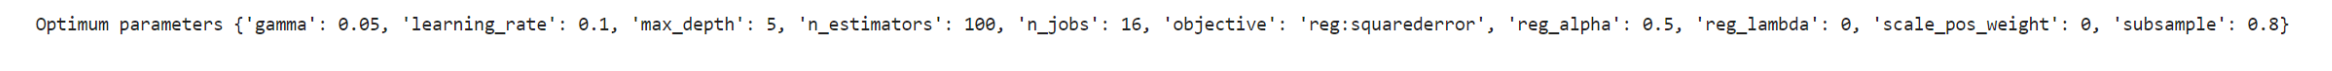

<div class="alert alert-block alert-info">
<b>Комментарий:</b> 
я разочарован эти парраметры не дали особой разницы по сравнению со 'стоком' (результат ниже)
</div>

In [21]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))
    params=grid.param_grid
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].set_xlabel(p.upper())

In [22]:
plot_search_results(best_model)

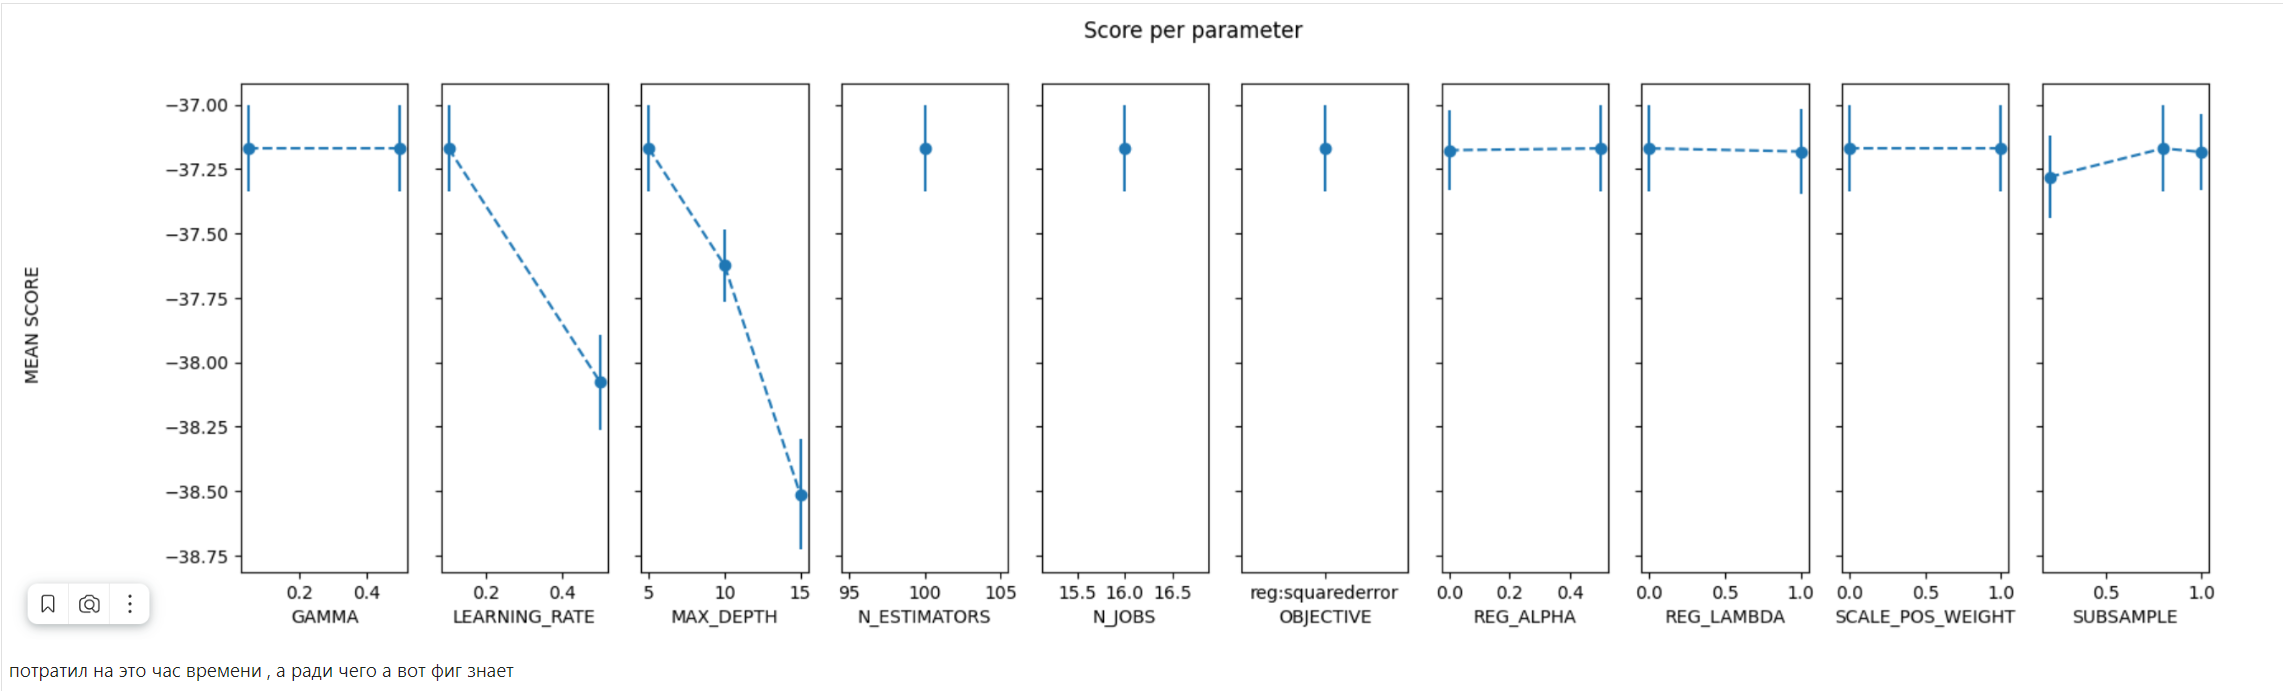

разница десятые доли...

Вывод эксперемента с моделями , дерево нет смысла использовать , по время/точность лучше всего показал себя XGBRegressor(бустинг), но в итоге будем использовать линейный XGBRegressor

In [23]:
model_0 = XGBRegressor(random_state=1, verbosity=1,booster='gblinear')
model_0.fit(X_0_train,y_0_train)
model_1 = XGBRegressor(random_state=1, verbosity=1,booster='gblinear')
model_1.fit(X_1_train,y_1_train)
model_2 = XGBRegressor(random_state=1, verbosity=1,booster='gblinear')
model_2.fit(X_2_train,y_2_train)

XGBRegressor(base_score=None, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

вывод по обучению: мы нашли оптимальную модель(но использовали самую точную) , также были выявлены лучшие гиперпараметры,но использовали "стоковые". По итогам обучения средняя ошибка составляет 37тыс бар.Для прода недопустимо, но в данной работе можно использовать так как модель недооценивает и переоценивает примерно на одинаковые величины (я подумал , а ведь у нас в итогую выборку будут чаще попадать переоценённые скважины)

## Подготовка к расчёту прибыли

записываем предсказания

In [24]:
X_0_test_ans = pd.DataFrame(np.array(y_0_test))
X_0_test_ans['pred'] = pd.DataFrame(np.array(model_0.predict(X_0_test)))
X_1_test_ans = pd.DataFrame(np.array(y_1_test))
X_1_test_ans['pred'] = pd.DataFrame(np.array(model_1.predict(X_1_test)))
X_2_test_ans = pd.DataFrame(np.array(y_2_test))
X_2_test_ans['pred'] = pd.DataFrame(np.array(model_2.predict(X_2_test)))

записываем rmse

In [25]:
X_0_test_ans = X_0_test_ans.rename(columns={0: 'true'})
X_0_test_ans['rmse'] = np.sqrt((X_0_test_ans['true']-X_0_test_ans['pred'])**2)
X_1_test_ans = X_1_test_ans.rename(columns={0: 'true'})
X_1_test_ans['rmse'] = np.sqrt((X_1_test_ans['true']-X_1_test_ans['pred'])**2)
X_2_test_ans = X_2_test_ans.rename(columns={0: 'true'})
X_2_test_ans['rmse'] = np.sqrt((X_2_test_ans['true']-X_2_test_ans['pred'])**2)

считаем денюшки

In [26]:
X_0_test_ans['profit_true_mln'] = X_0_test_ans['true'] * COST_OF_RAW_MATERIALS_MLN 
X_1_test_ans['profit_true_mln'] = X_1_test_ans['true'] * COST_OF_RAW_MATERIALS_MLN 
X_2_test_ans['profit_true_mln'] = X_2_test_ans['true'] * COST_OF_RAW_MATERIALS_MLN 
X_0_test_ans['profit_pred_mln'] = X_0_test_ans['pred'] * COST_OF_RAW_MATERIALS_MLN 
X_1_test_ans['profit_pred_mln'] = X_1_test_ans['pred'] * COST_OF_RAW_MATERIALS_MLN 
X_2_test_ans['profit_pred_mln'] = X_2_test_ans['pred'] * COST_OF_RAW_MATERIALS_MLN 

In [27]:
X_0_test_ans

,true,pred,rmse,profit_true_mln,profit_pred_mln
0,89.929339,122.077148,32.147810,40.468202,54.934715
1,94.203721,59.962650,34.241070,42.391674,26.983192
2,123.553649,103.766212,19.787436,55.599142,46.694794
3,83.166422,75.190239,7.976183,37.424890,33.835606
4,146.285652,117.368713,28.916939,65.828543,52.815918
...,...,...,...,...,...
24995,33.898039,68.830933,34.932894,15.254118,30.973919
24996,58.019701,88.219559,30.199857,26.108866,39.698799
24997,54.531967,27.716354,26.815612,24.539385,12.472359
24998,133.316523,78.842087,54.474436,59.992435,35.478939


In [28]:
X_1_test_ans

,true,pred,rmse,profit_true_mln,profit_pred_mln
0,80.859783,81.760895,0.901112,36.386902,36.792400
1,0.000000,-0.087799,0.087799,0.000000,-0.039510
2,53.906522,54.756920,0.850398,24.257935,24.640614
3,107.813044,108.366821,0.553777,48.515870,48.765068
4,53.906522,54.402054,0.495532,24.257935,24.480923
...,...,...,...,...,...
24995,26.953261,27.753792,0.800531,12.128967,12.489206
24996,137.945408,138.042633,0.097225,62.075433,62.119183
24997,0.000000,0.481606,0.481606,0.000000,0.216722
24998,84.038886,84.341545,0.302659,37.817499,37.953693


In [29]:
X_2_test_ans

,true,pred,rmse,profit_true_mln,profit_pred_mln
0,102.734478,97.207832,5.526645,46.230515,43.743523
1,72.411400,73.693817,1.282417,32.585130,33.162216
2,27.076410,89.225342,62.148932,12.184385,40.151402
3,53.209936,59.603718,6.393782,23.944471,26.821672
4,112.650597,149.768631,37.118034,50.692769,67.395882
...,...,...,...,...,...
24995,79.891012,125.395073,45.504061,35.950955,56.427780
24996,54.943838,80.496582,25.552744,24.724727,36.223461
24997,56.660575,78.752029,22.091454,25.497259,35.438412
24998,152.305382,91.344872,60.960510,68.537422,41.105190


In [30]:
print(X_0_test_ans['rmse'].mean())
print(X_1_test_ans['rmse'].mean())
print(X_2_test_ans['rmse'].mean())

31.080183953951405
0.7203627956440584
32.650550469768994


по поводу ошибки написал выше

In [31]:
X_1_test_ans.sort_values(by = 'pred') 

,true,pred,rmse,profit_true_mln,profit_pred_mln
13016,0.000000,-2.073898,2.073898,0.000000,-0.933254
4518,0.000000,-1.925827,1.925827,0.000000,-0.866622
4087,0.000000,-1.923386,1.923386,0.000000,-0.865524
16666,0.000000,-1.877434,1.877434,0.000000,-0.844845
993,0.000000,-1.598495,1.598495,0.000000,-0.719323
...,...,...,...,...,...
11893,137.945408,139.676483,1.731075,62.075433,62.854416
11381,137.945408,139.708267,1.762859,62.075433,62.868717
840,137.945408,139.769226,1.823818,62.075433,62.896149
20892,137.945408,139.855148,1.909741,62.075433,62.934814


нашёл несостыков , отрицательное значение в оценки , но на наше дальнейшее иследование не повлияет(но в идеале все негативные значения поменять на 0)

у нас есть 500 точек выборка из них мы выбираем лучшие 200 и разрабатываем (бюджет на разработку в регионе 10млрд - тоесть 50млн на скважину , в среднем со скважины должно приходить по 111.11 тыс.бар - цена ошибки крыло от боинга)

In [32]:
print(X_0_test_ans['true'].mean())
print(X_1_test_ans['true'].mean())
print(X_2_test_ans['true'].mean())
print(X_0_test_ans['pred'].mean())
print(X_1_test_ans['pred'].mean())
print(X_2_test_ans['pred'].mean())

92.42341417936545
69.11776493910608
95.24563112133823
92.49263
69.1204
94.95683


если брать всё подряд , мы уйдём в минус

## Расчёт прибыли и рисков 

In [33]:
def clean_money(data):
    #принимает на входе датасет с 500 скважинами (обязательный параметр сколько получается со скважины тыс бар)
    data = data.sort_values(by = 'pred',ascending = False).head(POSSIBLE_WELLS )
    data_bar = data['true'].sum()
    clear_money = data_bar*COST_OF_RAW_MATERIALS_MLN  - BUDGET_OF_THE_REGION_MLN 
    return clear_money

функция которая построит бутстрэп

In [34]:
values_0 = []
for i in range(1000):
    t_samples = X_0_test_ans.sample(500, replace=True, random_state=i)
    p_samples = clean_money(t_samples) 
    values_0.append(p_samples)

values_0 = pd.Series(values_0,dtype = 'float')
values_0

0      373.189083
1      865.504914
2      484.164491
3      700.136706
4      583.376866
          ...    
995    -36.725003
996    304.471712
997    413.975560
998    540.437088
999    490.922474
Length: 1000, dtype: float64

In [35]:
values_1 = []
for i in range(1000):
    t_samples = X_1_test_ans.sample(500, replace=True, random_state=i)
    p_samples = clean_money(t_samples) 
    values_1.append(p_samples)

values_1 = pd.Series(values_1,dtype = 'float')
values_1

0      639.654659
1      327.909096
2      681.017548
3      839.440523
4      578.325624
          ...    
995    299.359372
996    673.118169
997    619.688513
998    497.652440
999    586.909201
Length: 1000, dtype: float64

In [36]:
values_2 = []
for i in range(1000):
    t_samples = X_2_test_ans.sample(500, replace=True, random_state=i)
    p_samples = clean_money(t_samples) 
    values_2.append(p_samples)
values_2 = pd.Series(values_2,dtype = 'float')
values_2

0       59.273596
1      126.437465
2      349.386775
3      454.736137
4      317.424900
          ...    
995    200.206548
996    764.908967
997    265.413213
998    440.442606
999    748.147316
Length: 1000, dtype: float64

выше записали результаты прибыли в выборке, ниже проанализируем

In [37]:
print(values_0.mean())
print(values_1.mean())
values_2.mean()

448.00601609666427
474.101281951189


390.92068432955864

сразу бросается в глаза , второй регион убыточный , ниже рассмотрим доверительный интервал = 95%

In [38]:
print(values_0.quantile(0.025),values_0.quantile(0.975))
print(values_1.quantile(0.025),values_1.quantile(0.975))
print(values_2.quantile(0.025),values_2.quantile(0.975))

-93.28727766025513 950.2843555320735
97.42294878621988 881.6026802336644
-119.01784931868532 912.5391616546931


в этом доверительном интервале мы видем что первый и третий регион прибольны , второй безнадёжно убыточен

In [39]:
#ячейка ревьюера


'Риск убытков = {:.2%} '.format((pd.Series([-2, -1, 4, 5])<0).mean())

'Риск убытков = 50.00% '

In [40]:
'Риск убытков = {:.2%} '.format((pd.Series(values_0)<0).mean())

'Риск убытков = 5.60% '

In [41]:
'Риск убытков = {:.2%} '.format((pd.Series(values_1)<0).mean())

'Риск убытков = 0.70% '

In [42]:
'Риск убытков = {:.2%} '.format((pd.Series(values_2)<0).mean())

'Риск убытков = 7.30% '

In [43]:
print(values_0.min())
print(values_1.min())
values_2.min()

-570.787320084637
-155.88120672847617


-561.4504710012407

<b>вывод:</b>
<br>основная информация с которой мы работали это столбец Product (целевая переменная) , также задействовали все столбцы изначального дата сета + из результатов предугадываний модели составили ещё один датасет на основе которого проводили анализ
<br>итог эксперементов с моделями:на данный момент XGBRegressor показался оптимальной моделью , но он слишком долгий в работе , в итоге получили (rmse = 37), Но во второй скважите погрешность на порядок меньше
<br>все регионы являются прибыльными с вероятностью больше 90% , рекомендация - втором регионе самая маленькая ошибка-следовательно предсказания по этому региону показывают самые правдаподобные варинаты . + самый низкий риск я рекомендую разработать регион номер 2 (по причине которую указал раньше)